# Main Dashboard of PhD experiments in pre silicon

In [1]:
%matplotlib inline
results_file = 'presilicon_results.csv'
import os
from pca.analytics import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

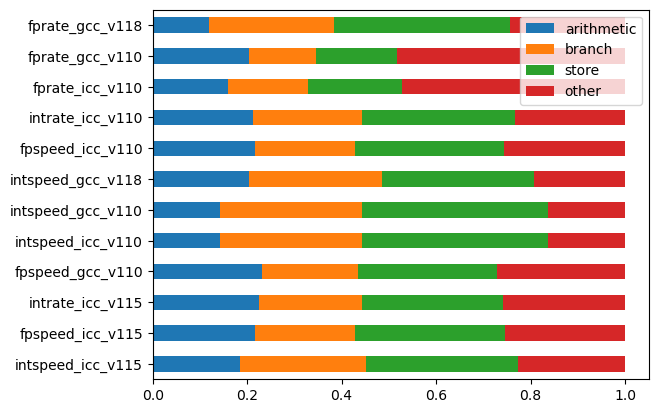

,test_name,arithmetic,branch,store,other
0,intspeed_icc_v115,0.185211,0.265828,0.322163,0.226798
1,fpspeed_icc_v115,0.216477,0.211054,0.319204,0.253265
2,intrate_icc_v115,0.224198,0.218006,0.299543,0.258253
3,fpspeed_gcc_v110,0.231113,0.203147,0.294531,0.271209
4,intspeed_icc_v110,0.142368,0.300834,0.393578,0.163219
5,intspeed_gcc_v110,0.142060,0.300718,0.394037,0.163185
6,intspeed_gcc_v118,0.203160,0.281759,0.321229,0.193852
7,fpspeed_icc_v110,0.217222,0.211020,0.316314,0.255443
8,intrate_icc_v110,0.213217,0.230732,0.321994,0.234057
9,fprate_icc_v110,0.158721,0.169491,0.200187,0.471601


In [2]:
files = dir_list = os.listdir("tests/pre_silicon_runs")
my_labels = ['arithmetic', 'branch', 'store', 'other']
df_global = pd.DataFrame(columns=my_labels)
for file_name in files:
    test_name = file_name
    df = read_histogram(os.path.join("tests/pre_silicon_runs",file_name))
    df_sumary = calcualte_values(df)
    df_global.loc[test_name] = df_sumary['probability'].values.tolist()

plot_stacked_bar(df_global)

df_global.reset_index(inplace=True)
df_global = df_global.rename(columns={"index": "test_name"} )

display(df_global)

df_global.to_csv("presilicon_results.csv")

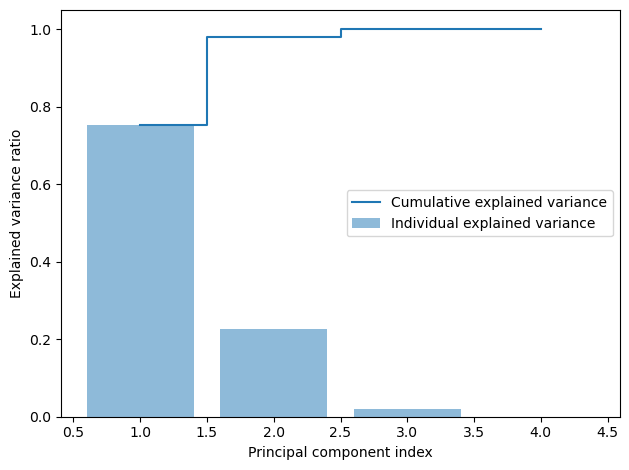

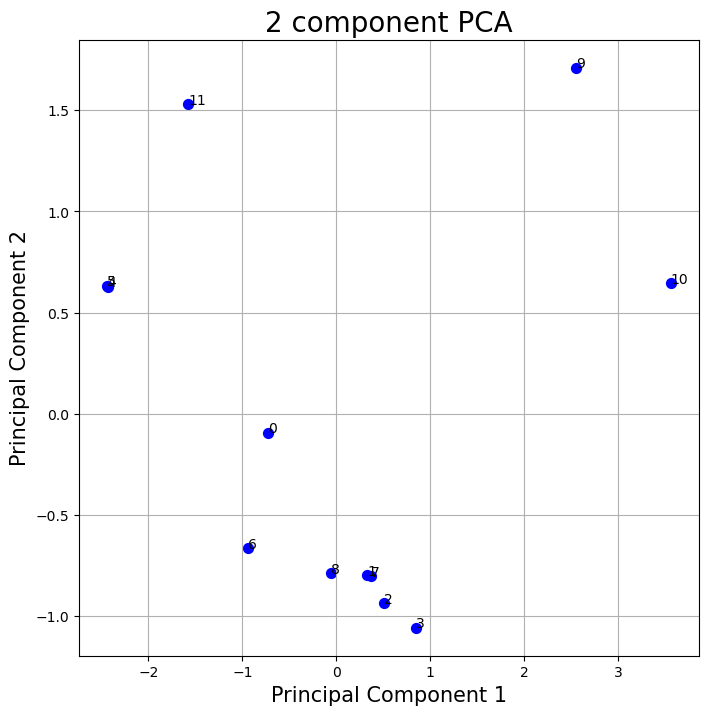

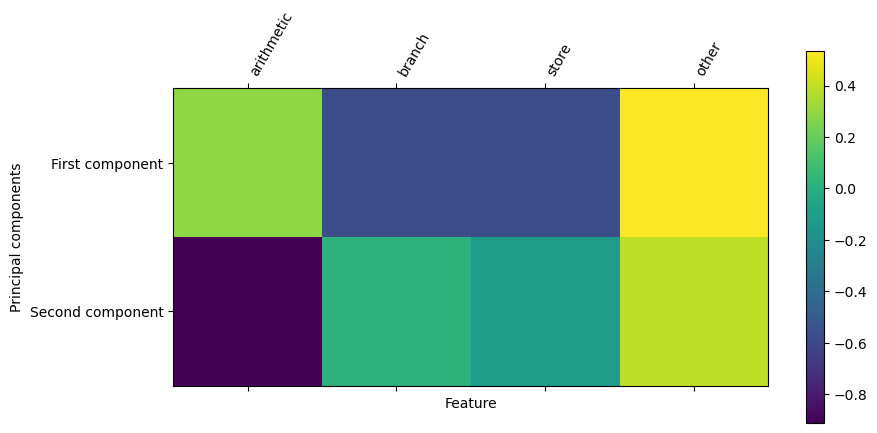

In [3]:


df = df_global

df_ = df.loc[:, df.columns != 'test_name']
df_ = (df_-df_.min())/(df_.max()-df_.min())
extracted_col = df["test_name"]
df_.insert(0, 'test_name', extracted_col)
df_.set_index('test_name')
df_.to_csv('normalized_df.csv')
df = df_

features = list(df.columns)[1:]
test_column = list(df.columns)[0]

pca_df = get_PCA(df, features, test_column)



# Plot characteristics of the worklaods

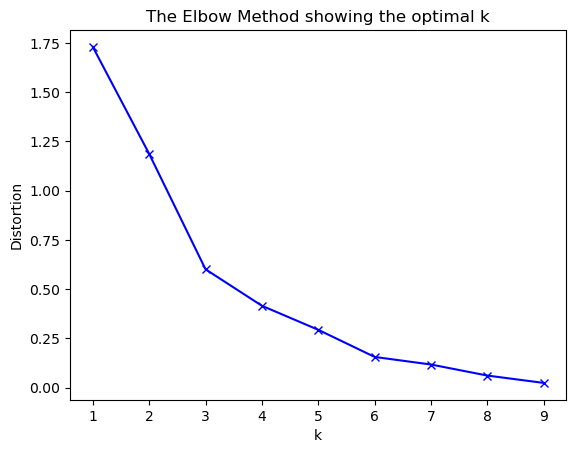

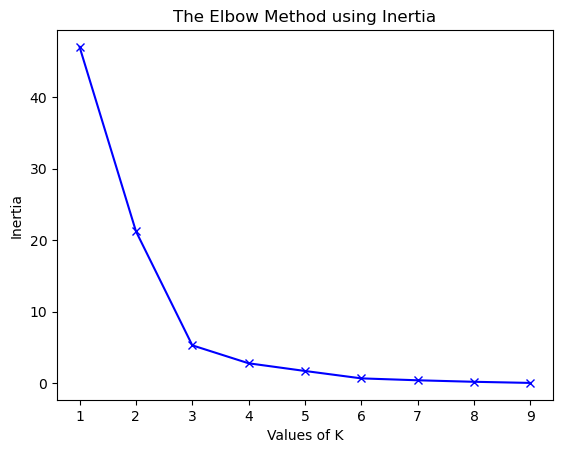

3


In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))

In [5]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 3


## Clasification based on optimal number of clusters

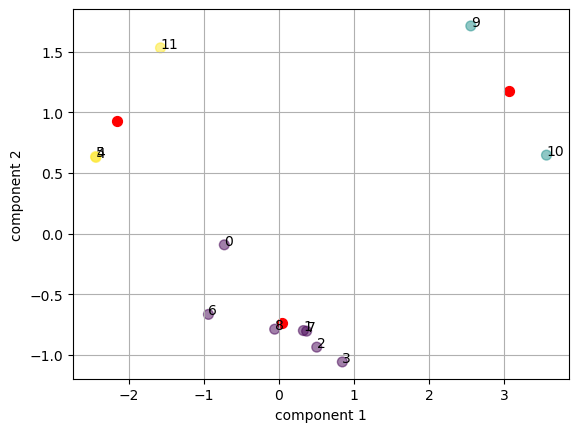

   PRED          test_name
0     0  intspeed_icc_v115
0     0   fpspeed_icc_v115
0     0   intrate_icc_v115
0     0   fpspeed_gcc_v110
0     0  intspeed_gcc_v118
0     0   fpspeed_icc_v110
0     0   intrate_icc_v110
1     1    fprate_icc_v110
1     1    fprate_gcc_v110
2     2  intspeed_icc_v110
2     2  intspeed_gcc_v110
2     2    fprate_gcc_v118


In [7]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

## Clasification based on 2 clusters number of clusters

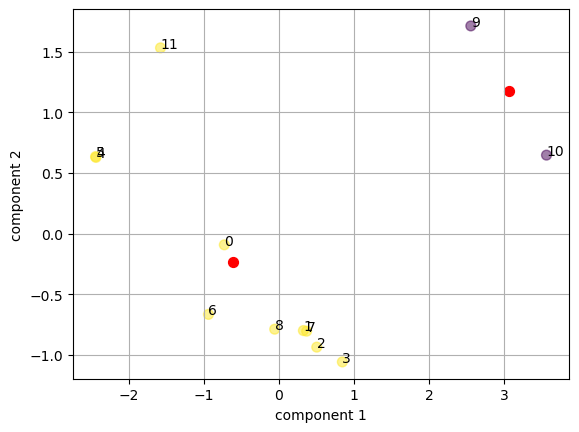

   PRED          test_name
0     0    fprate_icc_v110
0     0    fprate_gcc_v110
1     1  intspeed_icc_v115
1     1   fpspeed_icc_v115
1     1   intrate_icc_v115
1     1   fpspeed_gcc_v110
1     1  intspeed_icc_v110
1     1  intspeed_gcc_v110
1     1  intspeed_gcc_v118
1     1   fpspeed_icc_v110
1     1   intrate_icc_v110
1     1    fprate_gcc_v118


In [11]:
df_result,kmeans = kmean_cluster("pca.csv",2)
print(df_result)

# Get the test cases closer to centroid

In [30]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
10,10,3.561479,0.646052,fprate_gcc_v110
0,0,-0.725366,-0.093245,intspeed_icc_v115


,test_name,arithmetic,branch,store,other
0,intspeed_icc_v115,0.185211,0.265828,0.322163,0.226798
10,fprate_gcc_v110,0.204288,0.141344,0.170889,0.483480


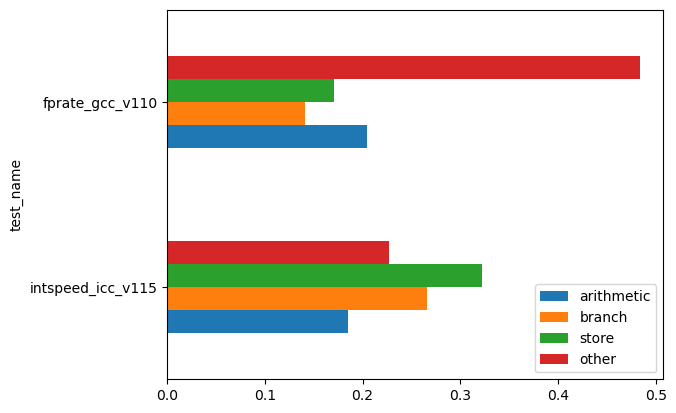

In [31]:
list_tests = df['test_name'].tolist()
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")
df2

,REAL,PRED,test_name
0,0,0,fprate_gcc_v110
1,0,1,fprate_gcc_v118
2,0,0,fprate_icc_v110
3,0,1,fpspeed_gcc_v110
4,0,1,fpspeed_icc_v110
5,0,1,fpspeed_icc_v115
6,1,1,intrate_icc_v110
7,1,1,intrate_icc_v115
8,1,1,intspeed_gcc_v110
9,1,1,intspeed_gcc_v118


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


adjusted_rand_score 0.06382978723404255

normalized_mutual_info_score 0.23135989198307788

fowlkes_mallows_score 0.592220092263982

hamming_distance 0.3333333333333333


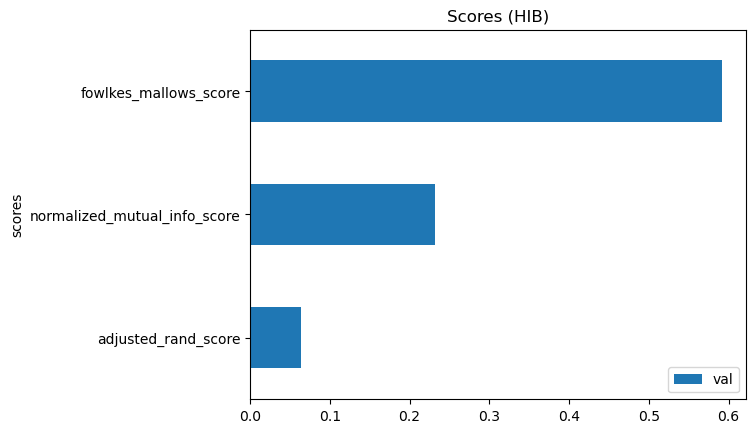

In [44]:
df = pd.read_csv("clusters_pre.csv")
display(df)

labels_true = df["REAL"].tolist()

labels_pred = df["PRED"].tolist()

display(labels_true)
display(labels_pred)

#labels_true = REAL_sorted["REAL"].tolist()

scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")